# CS 2150 Computer Project 5: Number Representation & Graph Representation


**Goals:** Gain an appreciation for base conversions and various representations of integers as well as experience in representing graphs in code, using Python's dict data structure, and writing a simple graph algorithm.

**Lecture Reference:** L08, L11, L12

**Instructions:** Carefully read all of the text in the Markdown cells; these give you information about the assignment. **Numbered, heading-level text at the bottom of the document describes the project deliverables.** Cells requesting the implementation of a function also include `assert` statements. Use these statements as a guide to the expected output of your function; if the assertions fail, then the function is invalid.

**Note: Include each deliverable directly underneath the markdown cell which asks for it.**

**Note also: when we receive your notebook, the first thing we will do is clear its memory and run it from the beginning.** You are responsible for ensuring that when we do this, the entire notebook executes and computes the desired results. Notebooks which fail to execute will typically receive low grades.

**Note this too: hard-coded answers, even if correct, will be awarded few if any points.** Your answers should be generated programmatically, not derived offline and then hard-coded.

**Beware:** This project includes a markdown deliverable in which you are expected to write some equations in LaTex!

#Part 1 What's in a Base? That which we call thirteen by any other radix would still be as prime.

## Introduction

In lecture, we talked about decimal and binary representations of numbers. To recall, here are the definitions of both of those:

> The decimal representation of a positive integer $X$ is a string of digits $d_nd_{n-1}\dots d_2d_1d_0$, where each $d_i\in\{0,1,2,3,4,5,6,7,8,9\}$ and $X=d_n\cdot 10^n+d_{n-1}\cdot 10^{n-1}+\dots+d_2\cdot 10^2+d_1\cdot 10^1+d_0\cdot 10^0$.

> The binary representation of a positive integer $X$ is a string of digits $b_nb_{n-1}\dots b_2b_1b_0$, where each $b_i\in\{0,1\}$ and $X=b_n\cdot 2^n+b_{n-1}\cdot 2^{n-1}+\dots+b_2\cdot 2^2+b_1\cdot 2^1+b_0\cdot 2^0$

# Deliverable #1: General Base Representation *In Math!*
Using the next markdown cell, give a definition for the representation of a positive integer $X$ in a general base $B$. You will want to use LaTeX syntax to affect super- and sub-scripts.

 The representation of a positive integer $X$ in a base $B$ (where $B \geq 2$) is a string of digits $d_nd_{n-1}\dots d_1d_0$, where each digit $d_i$ belongs to a set of $B$ unique symbols representing values from $0$ to $B-1$, such that: 
 $$X = \sum_{i=0}^{n} d_i \cdot B^i = d_n \cdot B^n + d_{n-1} \cdot B^{n-1} + \dots + d_1 \cdot B^1 + d_0 \cdot B^0$$
 

 Each $d_i$ must satisfy $0 \leq d_i < B$.

## Computer Representations
Computers natively represent numbers in binary. When we interact with computers, the internal representation is converted to a string of characters that are convenient for humans, be that decimal, hexadecimal, or otherwise. So, we are going to implement functions that translate to and from the internal representation and several arbitrary bases:

- Binary (base 2)
- Octal (base 8)
- Decimal (base 10)
- Duodecimal (base 12)$^1$
- Hexadecimal (base 16)
- Garblaxian (base 59)
- Cuneiform (base 60)

The next cell defines the sets of digits each of these systems employ.

In [11]:
base2 = 'Ol'
base8 = 'O1234567'
base10 = 'O123456789'
base16 = 'O123456789ABCDEF'
duodecimal = 'O123456789AB'
aliens = 'ᐁᐃᐄᐅᐆᐇᐉᐊᐋᐖᐛᐯᐱᐲᐳᐴᐵᐷᐸᐹᑀᑂᑅᑇᑈᑌᑍᑎᑏᑐᑑᑒᑓᑔᑕᑖᑝᑟᑢᑤᑥᑫᑭᑮᑯᑰᑱᑲᒉᒋᒌᒍᒏᒐᒒᒕᒗᒘᒝ'
babylonian = ['𒊹𒊹','𒊹𒑰','𒊹𒈫','𒊹𒐈','𒊹𒐉','𒊹𒐊','𒊹𒐋','𒊹𒑂','𒊹𒑄','𒊹𒑆','𒌋𒊹','𒌋𒑰','𒌋𒈫','𒌋𒐈','𒌋𒐉','𒌋𒐊','𒌋𒐋','𒌋𒑂','𒌋𒑄','𒌋𒑆','𒎙𒊹','𒎙𒑰','𒎙𒈫','𒎙𒐈','𒎙𒐉','𒎙𒐊','𒎙𒐋','𒎙𒑂','𒎙𒑄','𒎙𒑆','𒌍𒊹','𒌍𒑰','𒌍𒈫','𒌍𒐈','𒌍𒐉','𒌍𒐊','𒌍𒐋','𒌍𒑂','𒌍𒑄','𒌍𒑆','𒑩𒊹','𒑩𒑰','𒑩𒈫','𒑩𒐈','𒑩𒐉','𒑩𒐊','𒑩𒐋','𒑩𒑂','𒑩𒑄','𒑩𒑆','𒑪𒊹','𒑪𒑰','𒑪𒈫','𒑪𒐈','𒑪𒐉','𒑪𒐊','𒑪𒐋','𒑪𒑂','𒑪𒑄','𒑪𒑆']

Ideally, your implementation of each function will support any and all of these counting systems. However, since the representation in the Babylonian system are composed of two UTF8 characters per digit, the tests for each deliverable will not prevent you from working on the remaining deliverables in this project.

In [12]:
## DO NOT MODIFY THIS FUNCTION! IT IS USED INSTEAD OF assert TO TEST YOUR CODE
def expectEqual(a, b):
    if a != b: print('FAIL expected:', b, ' got:', a)

# Deliverable #2: General String to Integer
Implement a number parser. The function should take a string representation of a number and a base and convert the string into a Python integer. **Note: in all deliverables, hard-coded components may help you pass tests, but they will receive very few points.** For example, the character `'O'` always has the value 0, but we will not look favorably on code which says something like `if character=='O' : value = 0`. Your code should infer the value of the character `'O'` based on its *position* in the string `base2`, etc.

In [13]:
def stringToInt(number, base):
    base_len = len(base)
    result = 0
    current_pos = 0
    number_len = len(number)

    while current_pos < number_len:
        found_digit = False
        ## I check from longest to shortest string representation first
        possible_digits = sorted([(i, digit) for i, digit in enumerate(base)], key=lambda x: len(str(x[1])), reverse=True)

        for i, digit_str in possible_digits:
            if(isinstance(digit_str, str) and number.startswith(digit_str, current_pos)):
                digit_value = i
                result = result * base_len + digit_value
                current_pos += len(digit_str)
                found_digit = True
                break

        if(not found_digit):
            raise ValueError(f"Invalid part of number '{number}' starting at index {current_pos} for the given base.")

    return result

expectEqual(stringToInt('2O', base10), 20)
expectEqual(stringToInt('31337', base10), 31337)
expectEqual(stringToInt('lOlOO', base2), 20)
expectEqual(stringToInt('llllOlOOllOlOOl', base2), 31337)
expectEqual(stringToInt('2O', base8), 16)
expectEqual(stringToInt('31337', base8), 13023)
expectEqual(stringToInt('2O', base16), 32)
expectEqual(stringToInt('31337', base16), 201527)
expectEqual(stringToInt('ᑀ', aliens), 20)
expectEqual(stringToInt('𒎙𒊹', babylonian), 20)
expectEqual(stringToInt('𒊹𒈫𒊹𒐈', babylonian), 123)
expectEqual(stringToInt('bb','ab'), 3)

# Deliverable #3: Integer to String representation

Given an integer and a base, generate the string representation of number in given base.

In [14]:
def intToString(integer, base):
    base_len = len(base)

    ## no base length isn't provided but just in case...
    if(base_len == 0):
        return ""

    result = ""
    num = integer

    while True:
        remainder = num % base_len
        result = str(base[remainder]) + result
        num //= base_len
        if(num == 0):
            break

    return result

expectEqual(intToString(1230,base10), '123O')
expectEqual(intToString(31337,base10), '31337')
expectEqual(intToString(123,base2), 'llllOll')
expectEqual(intToString(31337,base2), 'llllOlOOllOlOOl')
expectEqual(intToString(31337,base8), '75151')
expectEqual(intToString(123,base8), '173')
expectEqual(intToString(123,duodecimal), 'A3')
expectEqual(intToString(31337,duodecimal), '16175')
expectEqual(intToString(123,base16), '7B')
expectEqual(intToString(31337,base16), '7A69')
expectEqual(intToString(123,aliens), 'ᐄᐇ')
expectEqual(intToString(123,babylonian), '𒊹𒈫𒊹𒐈')
expectEqual(intToString(51,babylonian), '𒑪𒑰')
expectEqual(intToString(7,'ab'),'bbb')

## Integer Operations: Addition

Sometime in elementary school, you probably learned how to perform the addition operation. You may have also learned how to add numbers with more than one decimal digit. But, let's review. Given two numbers, $a,b$ represented in decimal as $a_na_{n-1}\dots a_2a_1a_0$ and $b_mb_{m-1}\dots b_2b_1b_0$, respectively, then the following procedure will yield $a+b=c$ represented in decimal as $c_pc_{p-1}\dots c_2c_1c_0$ where $p$ is the greater of $m$ and $n$:

0. Let $carry=0$.
1. Let $i=0$.
2. If $a_i$ and $b_i$ exist, let $c_i=a_i+b_i+carry$.
3. Otherwise:
  3. If $a_1$ exists, let $c_i=a_i+carry$.
  3. If $b_1$ exists, let $c_i=b_i+carry$.
4. Let $carry=0$.
5. If $c_i>9$, let $carry=1$ and $c_i=c_i\text{mod}10$.
6. Let $i=i+1$.
7. If $a_i$ and $b_i$ exist, go to step 2.
8. If $carry>0$, let $c_i=1$.

This procedure can be generalized to work with numbers represented in any base, and part of your task is to figure out exactly how.

# Deliverable #4: In-base Addition

In the real world, we would just take the functions we just created above, combine them with the existing addition facilities in the computer and compute sums of numbers represented in any base.

But, this isn't the real world at all. This is Discrete Structures.

Implement a generic function that performs addition in-base (with carries and everything).

In [15]:
def add(a, b, base):
    int_a = stringToInt(a, base)
    int_b = stringToInt(b, base)

    sum_int = int_a + int_b

    sum_str = intToString(sum_int, base)

    return sum_str

expectEqual(add('123','123',base10), '246')
expectEqual(add('98','123',base10), '221')
expectEqual(add('lOl','lO',base2), 'lll')
expectEqual(add('lOlO','lO',base2), 'llOO')
expectEqual(add('123','123',base8), '246')
expectEqual(add('4563','77',base8), '4662')
expectEqual(add('123','123',duodecimal), '246')
expectEqual(add('123','123',base16), '246')
expectEqual(add('4563','78',base16), '45DB')
expectEqual(add('ᐄᐇ','ᑅᑇᑈ',aliens), 'ᑅᑌᑐ')
expectEqual(add('ᒍᒏᒐ','ᒍᒏᒐ',aliens), 'ᐃᑯᑱᑲ')
expectEqual(add('ᒒᒕᒗᒘᒝ','ᑅᑇᑈ',aliens), 'ᒒᒗᑀᑅᑇ')
expectEqual(add('𒊹𒑰𒊹𒈫𒊹𒐈','𒊹𒑰𒊹𒈫𒊹𒐈',babylonian), '𒊹𒈫𒊹𒐉𒊹𒐋')
expectEqual(add('𒑪𒑄','𒑪𒑆',babylonian), '𒊹𒑰𒑪𒑂')

$^1$*Check out the [Wikipedia article](https://en.wikipedia.org/wiki/Duodecimal) if you happen to be in the market for a new counting system*

## Part 2
#Graph Representation

**To test your code, we are providing the following functions which will verify basic formatting for your adjacency lists.** If tests in the notebook fail, something is wrong. However, the converse may not be true -- passing tests does not guarantee that your code is implementing the exactly correct functionality.

In [16]:
def expectEqual(a, b):
    if a != b :
        print('FAIL expected:', b, ' got:', a)

def checkUndirected(adjList) :
    for node in adjList :
        for neighbor in adjList[node] :
            try :
                if not node in adjList[neighbor] :
                    print('FAIL: graph is not undirected: '+str(adjList))
                    return
            except KeyError :
                print('FAIL: missing node in adjacency list for graph '+str(adjList))
                return

def checkSelfLoops(adjList) :
    for node in adjList :
        if node in adjList[node] :
            print('FAIL: graph has a self-loop: '+str(adjList))
            return

# The Python `dict` object

In this project, we will implement a particular type of adjacency list using Python's `dict` object (`dict` is short for "dictionary"). At a very high level, a `dict` is like a list that can be indexed by any object. (At a low level, a `dict` is a hash map.)

You can initialize an empty `dict` using curly braces:

In [17]:
my_dict = {}

A `dict` is a little bit like a list, in the sense that it contains some objects. Recall that in a list, each integer index is associated with a value. In a `dict`, the indices don't have to be integers -- they can be any object (strictly: any "hashable" object -- see documentation for more details). In a `dict`, we call the references "keys." To assign something to a key in a dict, use square brackets. Keys don't all have to be integers, or even the same datatype!

In [18]:
my_dict['A'] = 234
my_dict[5] = "some string"
print(my_dict)

{'A': 234, 5: 'some string'}


The values in a `dict` can be any Python object. In the next cell, we add a new key/value pair whose value is a set:

In [19]:
my_dict['a set']={1,2,3}
print(my_dict)
my_dict['a set'].add(4)
print(my_dict)

{'A': 234, 5: 'some string', 'a set': {1, 2, 3}}
{'A': 234, 5: 'some string', 'a set': {1, 2, 3, 4}}


The dictionary `my_dict` now has three keys. If you want to iterate over the keys in a `dict`, you can use a for loop like this:

In [20]:
for key in my_dict :
    print('the key: ' + str(key) + '\tis associated with the value: ' + str(my_dict[key]))

the key: A	is associated with the value: 234
the key: 5	is associated with the value: some string
the key: a set	is associated with the value: {1, 2, 3, 4}


That's enough to get you started, but to complete Deliverable #1, you might want to take a look at the [official documentation](https://docs.python.org/3.8/tutorial/datastructures.html#dictionaries) or do some [searching for tutorials.](https://www.google.com/search?client=firefox-b-1-d&q=python+dict+tutorial)

# Deliverable #5: Practice using Python `dict` objects

Create a function called `list_to_dict` which accepts a list of pairs $(a_1,b_1),(a_2,b_2),\dots,(a_n,b_n)$ and returns a dictionary with keys $a_1,a_2,\dots,a_n$. The dictionary values should be `set` objects; the value associated with key $a_i$ should be the set $\{b_k:a_k=a_i\}$. For example, the input list `[(1,2),(3,4),(5,6)]` should return the dictionary `{1: {2}, 3: {4}, 5: {6}}`. Input pairs could contain strings or numbers. Furthermore, you should not assume that the keys $a_i$ are distinct; your code should handle repeated keys by adding extra values to the associated set. For example, the input list `[(1,'a'),(1,3)]` should return the dictionary `{1: {'a', 3}}`. A concise description of the function's action is described in the function's docstring below, and several tests are provided.

In [28]:
def list_to_dict(input_list):
    '''
    Input:  list of 0 or more pairs [(a_1,b_1),...,(a_n,b_n)]; each a_i, b_i can be an integer or a string
    Output: dict with keys a_1,a_2,...,a_n.
            The value associated with key a_i is the set {b_k such that a_k=a_i}
    '''
    return_dict = {}
    for key, value in input_list:
        if(key not in return_dict):
            return_dict[key] = set()
        return_dict[key].add(value)
    return return_dict

expectEqual(list_to_dict([]),{})
expectEqual(list_to_dict([(1,2),(3,4)]),{1:{2},3:{4}})
expectEqual(list_to_dict([(1,2),(1,3)]),{1: {2, 3}})
expectEqual(list_to_dict([('a',7),(10,'b'),('strings can be keys too','they sure can')]),{'a': {7}, 10: {'b'}, 'strings can be keys too': {'they sure can'}})

## Graph Representation

As discussed in Lecture, the way we represent graphs in a computer matters. In this project, you'll write a function that converts from an edge-list representation into an adjacency-list representation.

Recall that an edge-list representation simply writes down an unstructured list of all the edges in a graph. While compact, this type of representation doesn't work very well with algorithms. To fix this, one option is to use *adjacency-lists* -- which explicitly contain a list of each node's neighbors. In this project, we will use Python's `dict` object to implement adjacency lists.

In this project, we use the following representations:

### Formats
**Edge list:** a `list` of edges represented as vertex pairs. For graph $(V,E)$ with $V=\{v_1,\dots,v_n\}$, the edge list representation is of the form `[(vi,vj),...,(vk,vl)]|`, where an edge exists between vertices `vi` and `vj`, an edge exists between vertices `vk` and `vl`, and so on.

**Adjacency list:** a `dict` with vertex/neighbor-set key/value pairs. That is, each vertex is a key, and that key's value is a *set* of that vertex's neighbors in the graph. For graph $(V,E)$ with $V=\{v_1,\dots,v_n\}$, the adjacency list representation is of the form `{v1 : {v1's neighbors}, v2 : {v2's neighbors},...}`.

**To help visualize graphs, we are providing the `drawGraph` function for your unlimited use.** See the function's docstring for information about how to use it. For your convenience, we also provide two examples of how it can be used below to draw graphs.

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

def drawGraph(adjList,actually_draw=True) :
    G = nx.Graph()
    for node in adjList :
        G.add_node(node)
        G.add_edges_from([(node,neighbor) for neighbor in adjList[node]])
    if actually_draw :
        nx.draw_spring(G, with_labels=True, font_weight='bold')

### Examples

In each code cell, we give an edge list, the corresponding adjacency list, and then use the provided `drawGraph` function to visualize the graph.
Note in each that the edge list is more compact than the adjacency list; this is partly because the adjacency list explicitly represents each edge twice.
For instance in Example 1, there is an edge between A and D; the adjacency list represents this by saying "one of A's neighbors is D," and also "one of D's neighbors is A."

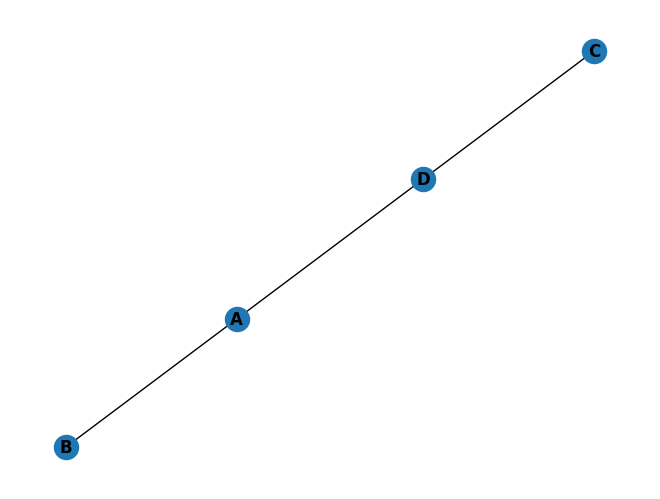

In [23]:
# Example 1
Gexample1_edgeList = [('A','B'),
                      ('C','D'),
                      ('A','D')]
Gexample1_adjList = {'A': {'B', 'D'},
                     'B': {'A'},
                     'C': {'D'},
                     'D': {'A', 'C'}}
drawGraph(Gexample1_adjList)

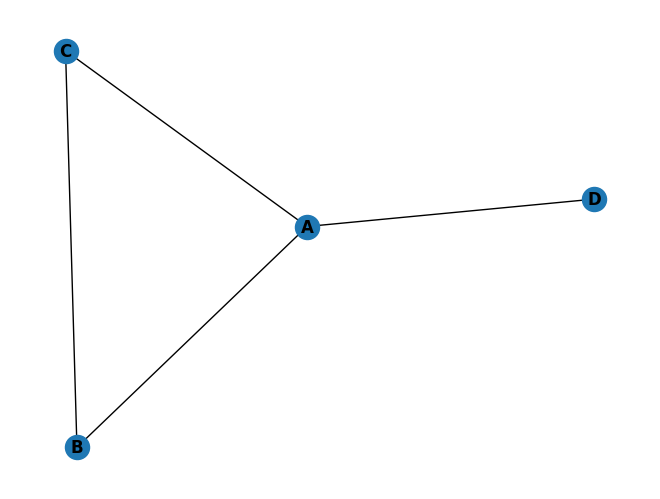

In [24]:
# Example 2
Gexample2_edgeList = [('A','B'),
                      ('C','B'),
                      ('A','D'),
                      ('A','C')]
Gexample2_adjList = {'A':{'B','C','D'},
                     'B':{'A','C'},
                     'C':{'A','B'},
                     'D':{'A'}}
drawGraph(Gexample2_adjList)

### Check Functions
In the next cell, we provide an example of how to use the check functions. If the checks pass, nothing is printed -- otherwise a simple message will print and we give three examples of this.

In [25]:
# Adjacency list is implemented as Python Dict, with node:neighborset key:val pairs.
G_selfloop = {'A':{'A'}} # this is a graph with a self-loop -- which we don't want
checkSelfLoops(G_selfloop)

G_Directed = {'A':{'B'}, # this is a graph with an edge from A to B, but no edge from B to A. Also don't want.
              'B':{}}
checkUndirected(G_Directed)

G_Directed2 = {'A':{'B'}} # this is an adjacency list that doesn't have an entry for node B. Not good.
checkUndirected(G_Directed2)

FAIL: graph has a self-loop: {'A': {'A'}}
FAIL: graph is not undirected: {'A': {'B'}, 'B': {}}
FAIL: missing node in adjacency list for graph {'A': {'B'}}


# Deliverable #6: Convert Edge-list representation to Adjacency-List representation

Now let's take our newfound knowledge of Python dictionaries and our definitions of graph representations and use it to represent graphs. Create a function called `edgeList_to_adjList` which accepts a list of edges (that is, vertex pairs) and returns an adjacency-list representation of the same graph according to the formatting described above. Several tests are provided to help you check your work. If your function works properly, the `MysteryGraph` will be visualized and show you a neat pattern.

FAIL expected: {'A': {'B'}, 'B': {'A'}}  got: {}
FAIL expected: {'A': {'B'}, 'B': {'A'}, 'C': {'D'}, 'D': {'C'}}  got: {}
FAIL expected: {'A': {'B'}, 'B': {'D', 'A'}, 'C': {'D'}, 'D': {'C', 'B'}}  got: {}
FAIL expected: {'A': {'D', 'C', 'B'}, 'B': {'D', 'C', 'A'}, 'C': {'D', 'B', 'A'}, 'D': {'C', 'B', 'A'}}  got: {}


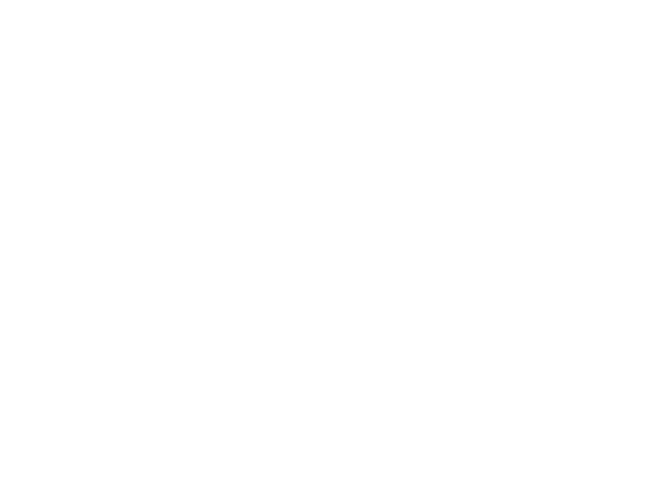

In [26]:
def edgeList_to_adjList(edgeList) :
    adjList = {}
    # complete function definition here!
    return adjList


expectEqual(edgeList_to_adjList([]),{})
expectEqual(edgeList_to_adjList([('A','B')]),{'A': {'B'}, 'B': {'A'}})
expectEqual(edgeList_to_adjList([('A','B'),('C','D')]),{'A': {'B'}, 'B': {'A'}, 'C': {'D'}, 'D': {'C'}})
expectEqual(edgeList_to_adjList([('A','B'),('C','D'),('B','D')]),{'A': {'B'}, 'B': {'D', 'A'}, 'C': {'D'}, 'D': {'C', 'B'}})
expectEqual(edgeList_to_adjList([('A','B'),('A','C'),('A','D'),('C','D'),('B','C'),('B','D')]),{'A': {'D', 'C', 'B'}, 'B': {'D', 'A', 'C'}, 'C': {'D', 'A', 'B'}, 'D': {'A', 'C', 'B'}})


MysteryGraph = [('A','B'),('A','C'),('A','D'),('A','E'),('A','F'),('B','C'),('B','D'),('B','E'),('B','G'),('C','D'),('C','E'),('C','H'),('D','E'),('D','I'),('E','J')]
checkSelfLoops(edgeList_to_adjList(MysteryGraph))
checkUndirected(edgeList_to_adjList(MysteryGraph))
drawGraph(edgeList_to_adjList(MysteryGraph)) # a fancy graph should be visualized if you get this right

# Deliverable #7: Determine if a given graph is Eulerian
Recall the a graph is called *Eulerian* if it is possible to walk around the graph, visiting every edge exactly once, and returning to your starting vertex. This was discussed in Lecture, and [more information can be found here.](https://en.wikipedia.org/wiki/Eulerian_path)

One way to determine that a graph is Eulerian is to actually find an eulerian circuit, or determine that no such circuit exists.

Complete the function definition below for function `eulerian`. The function's input should be a graph represented as **an edge list**. If the input graph is Eulerian, the function should output `True`, and if the input graph is not Eulerian, the function should output `False`. Note: you can assume that the input graph is connected (that is, that a path exists between every pair of vertices). Use whatever technique you want to determine Eulerianness!

In [27]:
def eulerian(edgeList) :
    '''
    Determine whether input graph is Eulerian.
    Input: Simple, undirected, connected graph represented by an edge list.
    Output: True if the input graph is Eulerian, False if the input graph is not Eulerian.
    '''

    # complete function definition here!
    return None


expectEqual(eulerian([('A','B')]),False)
expectEqual(eulerian([('A','B'),('B','C')]),False)
expectEqual(eulerian([('A','B'),('B','C'),('A','C')]),True)
expectEqual(eulerian([('A','B'),('B','C'),('A','D'),('C','D')]),True)
expectEqual(eulerian([('A','B'),('B','C'),('A','D'),('C','D'),('B','D'),('D','E'),('E','B')]),True)
expectEqual(eulerian([('A','B'),('A','C'),('A','D'),('A','E'),('B','C'),('B','D'),('B','E'),('C','D'),('C','E'),('D','E')]),True)
expectEqual(eulerian(MysteryGraph),False)

FAIL expected: False  got: None
FAIL expected: False  got: None
FAIL expected: True  got: None
FAIL expected: True  got: None
FAIL expected: True  got: None
FAIL expected: True  got: None
FAIL expected: False  got: None
